In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split


In [ ]:
# Step 1: Preprocess the data
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

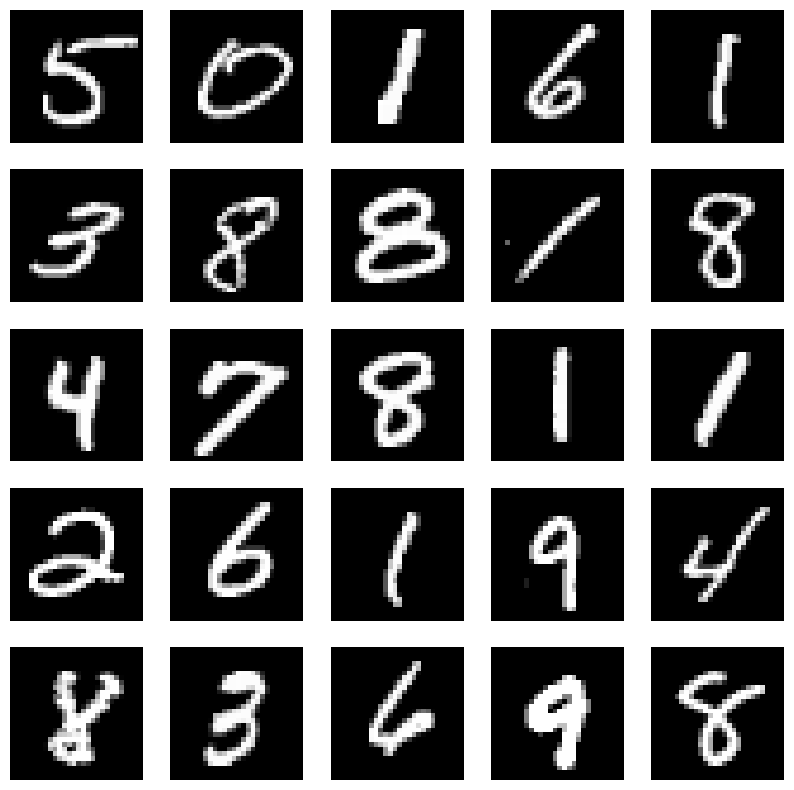

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Normalize pixel values
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [ ]:

# Split the data into training and testing sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)



In [ ]:
# Step 2: Baseline Model with Logistic Regression
# Initialize and train the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(train_images, train_labels)

# Test the logistic regression model
test_predictions_lr = logistic_regression_model.predict(test_images)
test_accuracy_lr = accuracy_score(test_labels, test_predictions_lr)
print("Test Accuracy (Logistic Regression):", test_accuracy_lr)

# Step 3: Ensemble of Machine Learning Algorithms
# Initialize individual models
decision_tree_model = RandomForestClassifier(n_estimators=100)
random_forest_model = RandomForestClassifier(n_estimators=100)
svm_model = SVC()

# Create ensemble model
ensemble_model = VotingClassifier(estimators=[('decision_tree', decision_tree_model),
                                              ('random_forest', random_forest_model),
                                              ('svm', svm_model)],
                                   voting='hard')

# Train ensemble model
ensemble_model.fit(train_images, train_labels)

# Test ensemble model
test_predictions_ensemble = ensemble_model.predict(test_images)
test_accuracy_ensemble = accuracy_score(test_labels, test_predictions_ensemble)
print("Test Accuracy (Ensemble):", test_accuracy_ensemble)

Test Accuracy (Logistic Regression): 0.9248
Test Accuracy (Ensemble): 0.9714


In [ ]:
#step 3

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import regularizers

In [ ]:
# Step 4: Neural Network Model Design
# Define neural network architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.summary()
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the training and validation images
train_images = train_images.reshape((train_images.shape[0], 28, 28))
val_images = val_images.reshape((val_images.shape[0], 28, 28))

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2647 - accuracy: 0.9251 - val_loss: 0.1445 - val_accuracy: 0.9553
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1140 - accuracy: 0.9654 - val_loss: 0.1089 - val_accuracy: 0.9666
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0780 - accuracy: 0.9765 - val_loss: 0.0947 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0590 - accuracy: 0.9816 - val_loss: 0.0870 - val_accuracy: 0.9743
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0452 - accuracy: 0.9851 - val_loss: 0.0833 - val_accuracy: 0.9761
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0982 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0299 - accuracy: 0.9899 - val_loss: 0.0892 - val_accuracy:

In [ ]:
#Model evaluating
model.evaluate(val_images , val_labels)

375/375 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9737


[0.11070039868354797, 0.9736666679382324]

In [ ]:

# Report metrics
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Neural Network Model Metrics:")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Neural Network Model Metrics:
Training Loss: 0.0191
Validation Loss: 0.1107
Training Accuracy: 0.9933
Validation Accuracy: 0.9737


In [ ]:
#Step 5
from tensorflow.keras.models import Sequential
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the training and validation images
train_images = train_images.reshape((train_images.shape[0], 28, 28))
val_images = val_images.reshape((val_images.shape[0], 28, 28))

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2823 - accuracy: 0.9211 - val_loss: 0.1521 - val_accuracy: 0.9569
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1242 - accuracy: 0.9641 - val_loss: 0.1105 - val_accuracy: 0.9672
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0860 - accuracy: 0.9748 - val_loss: 0.0966 - val_accuracy: 0.9712
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0637 - accuracy: 0.9815 - val_loss: 0.0898 - val_accuracy: 0.9726
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0898 - val_accuracy: 0.9732
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0831 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0773 - val_accuracy:

In [ ]:
# Evaluate the model
model.evaluate(val_images, val_labels)

# Report metrics
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Neural Network Model Metrics:")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Perform

375/375 [==============================] - 1s 2ms/step - loss: 0.0820 - accuracy: 0.9787
Neural Network Model Metrics:
Training Loss: 0.0161
Validation Loss: 0.0820
Training Accuracy: 0.9952
Validation Accuracy: 0.9787


In [ ]:
import pandas as pd

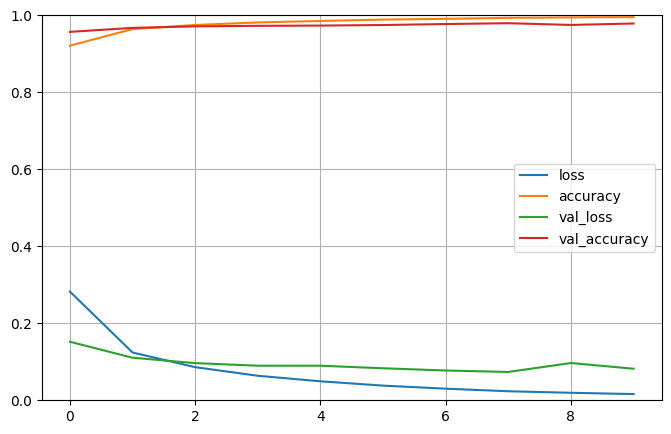

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

<ipython-input-12-468715c145ce>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels[:1000], cmap=plt.cm.get_cmap("jet", 10))


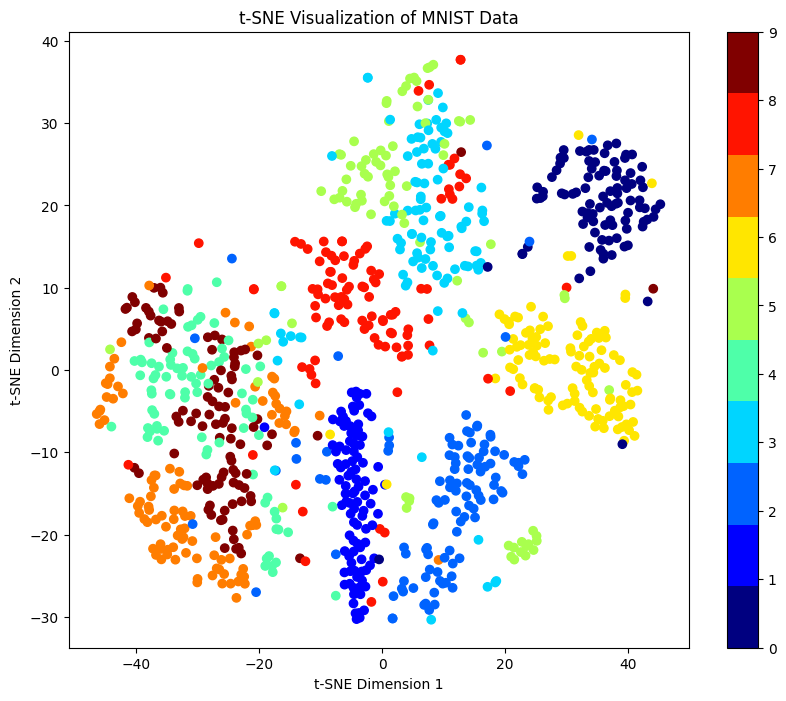

In [ ]:


# Step 6: Feature Transformation and Visualization
# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=50)
train_images_pca = pca.fit_transform(train_images)
test_images_pca = pca.transform(test_images)

# Train a neural network model on the PCA-transformed data
# [Implement and train your neural network model]

# Visualize the high-dimensional MNIST data in a 2D space using t-SNE
tsne = TSNE(n_components=2, random_state=42)
train_images_tsne = tsne.fit_transform(train_images[:1000])  # Use a subset of data for faster visualization
plt.figure(figsize=(10, 8))
plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels[:1000], cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar()
plt.title("t-SNE Visualization of MNIST Data")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()
